# Phase 1: Data loading and preprocessing

'file' content is downloaded from: https://www.kaggle.com/datasets/ogbuokiriblessing/saxenophobia-tweet-dataset-2017-2022

In [70]:
#Importing needed modules.

from pandas import read_csv , concat , DataFrame 
from pickle import dump
from matplotlib.pyplot import pie , title , show , plot ,legend , xlabel , ylabel
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding , GlobalMaxPooling1D , Dense
from tensorflow.keras.models import Sequential

#Instancing from "Tokenizer" object.

tokenizer = Tokenizer(oov_token='<00U00>')

In [71]:
#Data loading.

file = read_csv('SA_XenoDataset_2017-2022.csv')
df1 = file.copy()
df1.sample(5)

,Unnamed: 0,DateCreated,TimeCreated,CleanedTweet,Sentiment,Likes,No of replies,Language,Retweets,User Location,Tweet Origin,Coordinates,District,Province,Number of Attacks
2632,2632,2022-04-03,20:09:26,They fought against the Cuba donation. They...,Positive,0,0,en,0,"Ga-Matlala A Thaba, Moetagare",Springs,"longitude=28.3884227, latitude=-26.3364754",Urban,Gauteng,0
12202,12202,2019-09-23,07:34:03,If they’ll authorize that damage then they mu...,neutral,1,0,en,0,Phokoane Ga-Sekhukhune Limpopo Province.,Randburg,"longitude=27.8925632, latitude=-26.1368652",urban,Gauteng,0
8045,8045,2021-02-24,08:27:34,do you know where she was coming from? has ...,Negative,0,2,en,0,"Johannesburg, South Africa",Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Urban,Gauteng,0
935,935,2022-05-15,06:42:23,Everywhere !!,Positive,1,0,en,0,"Krugersdorp, South Africa",Munsieville,"longitude=27.7462384, latitude=-26.0830053",Rural,Gauteng,0
4759,4759,2022-02-23,09:55:41,Khoza is a smal...,Neutral,1,1,en,0,KwaMaphumulo,Durban,"longitude=30.8789097, latitude=-30.055938",Rural,KwaZulu-Natal,0


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15912 entries, 0 to 15911
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         15912 non-null  int64 
 1   DateCreated        15912 non-null  object
 2   TimeCreated        15912 non-null  object
 3   CleanedTweet       15908 non-null  object
 4   Sentiment          15912 non-null  object
 5   Likes              15912 non-null  object
 6   No of replies      15912 non-null  int64 
 7   Language           15912 non-null  object
 8   Retweets           15912 non-null  int64 
 9   User Location      15912 non-null  object
 10  Tweet Origin       15912 non-null  object
 11  Coordinates        15909 non-null  object
 12  District           15912 non-null  object
 13  Province           15912 non-null  object
 14  Number of Attacks  15912 non-null  object
dtypes: int64(3), object(12)
memory usage: 1.8+ MB


In [73]:
df1.isnull().sum()

Unnamed: 0           0
DateCreated          0
TimeCreated          0
CleanedTweet         4
Sentiment            0
Likes                0
No of replies        0
Language             0
Retweets             0
User Location        0
Tweet Origin         0
Coordinates          3
District             0
Province             0
Number of Attacks    0
dtype: int64

There are 4 null values in  CleanedTweet column

In [74]:
#Removing null values.

df1 = df1[['CleanedTweet','Sentiment']].dropna()

#Removing tweets that contains less than 3 words.

df1 = DataFrame([i for i in df1.to_numpy().tolist() if len(i[0].split())>2],columns=df1.columns)


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CleanedTweet  15509 non-null  object
 1   Sentiment     15509 non-null  object
dtypes: object(2)
memory usage: 242.5+ KB


According to the file description on the website there are 3 types of sentiments in data.

Negative (we consider them as Xenophobic tweets),
Neutral,
Positive (we consider them as No-Xenophobic tweets)

Since there are many typo in sentiment, We have to separate them by code below:

In [75]:
#Assigning 1 to negative tweets and 0 to the rest.

lbl = [1 if l.lower().strip().startswith('neg') else 0 for l in df1.Sentiment]

#Attaching new label column to data.  
    
df1 = concat([df1,DataFrame(lbl,index=df1.index,columns=['Label'])],axis=1)

In [76]:
df1.sample(10)

,CleanedTweet,Sentiment,Label
13730,Farm murders are actually very common in SA ...,Negative,1
13133,Are South Africans foreigners? Subhayiza man...,Positive,0
6870,Never has! I hear they say employers can now ...,Negative,1
11677,"Illegal immigrants, drug mules, brothel owners...",negative,1
12443,"Shoprite, woolworths and all these big multin...",Neutral,0
5981,"The only way to reclaim our country,deal with ...",Negative,1
9327,I feel like the words homophobia and xenophobi...,Neutral,0
15433,if only Gigaba worked with Mashaba in solving...,Negative,1
1163,You know !!! it’s only the foreigners ...,Neutral,0
12738,So In the recent events of child trafficking ...,neutral,0


In [77]:
df1.Label.value_counts()

Label
1    8945
0    6564
Name: count, dtype: int64

After a few hours working on different models, I made a decision to change structure of data by adding some new data from another file.

'file2' content is downloaded from: https://www.kaggle.com/datasets/buchali/xenophobia

In [78]:
#Data loading.

file2 = read_csv('xeno.csv')
df2 = file2.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3424 non-null   int64 
 1   Text        3424 non-null   object
 2   xenophobia  3424 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 57.0+ KB


In [79]:
#All texts are Xenophobic.

df2 = df2['Text']

#Assigning 1 to texts.

df2 = concat([df2,DataFrame([1 for i in range(len(df2))],index=df2.index,columns=['Label'])],axis=1)
df2.columns = ['CleanedTweet','Label']
df2.sample(10)

,CleanedTweet,Label
273,"Do you know? \nNow in Japan,45% of COVID19 in...",1
571,Why kill others? \nMan who had coronavirus ap...,1
1158,"Hey Tam, nothing like calling the kettle blac...",1
2869,"Completely agree,why should our precious virus...",1
3159,What's happening in this country ? Why foreign...,1
802,This is their last chance they must do their w...,1
574,Eight caught in Phuket for violating curfew - ...,1
2625,The same Administration that wants to keep o...,1
385,Tablighi Jamat have done a criminal act. The ...,1
1775,Foreigners doing the most in the crime industr...,1


In [80]:
#Separating rows that starts with 'p' letter in the first dataframe.

pos_df = DataFrame([i for i in df1.to_numpy().tolist() if i[1].lower().strip().startswith('p')],
                columns=df1.columns)

pos_df = pos_df.drop(['Sentiment'],axis=1)

#Making an unique dataframe from two dataframes.
#Actually No-Xenphobic texts are choosed from first dataframe with sentiment positive
#and Xenophobic one's are choosed from second dataframe.

df1 = concat([pos_df,df2],axis=0)

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 0 to 3423
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CleanedTweet  5782 non-null   object
 1   Label         5782 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 135.5+ KB


In [82]:
df1.Label.value_counts()

Label
1    3424
0    2358
Name: count, dtype: int64

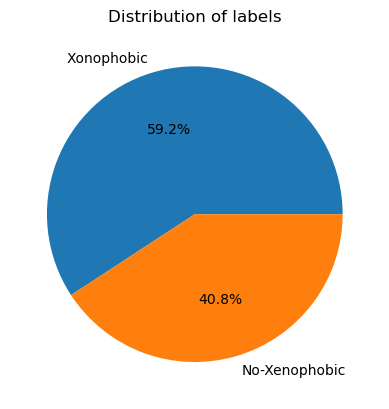

In [83]:
pie(df1.Label.value_counts().values,
    autopct='%1.1f%%',
    labels=['Xonophobic','No-Xenophobic'])
title('Distribution of labels')
show()

In [84]:
#Creating a function to remove stop words from each text.

def Filter(text)->str:
    '''Function Docstring'''
    stopwords = ["a", "about", "above", "after",
                 "again", "against", "all", "am", "an", "and",
                 "any", "are", "as", "at", "be", "because",
                 "been", "before", "being", "below", "between", "both", "but",
                 "by", "could", "did", "do", "does", "doing", "down", "during",
                 "each", "few", "for", "from", "further", "had", "has", "have",
                 "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", 
                 "herself", "him", "himself", "his", "how", "how's", "i", "i'd",
                 "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's",
                 "its", "itself", "let's", "me", "more", "most", "my", "myself",
                 "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours",
                 "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's",
                 "should", "so", "some", "such", "than", "that", "that's", "the", "their",
                 "theirs", "them", "themselves", "then", "there", "there's", "these", "they",
                 "they'd", "they'll", "they're", "they've", "this", "those", "through", "to",
                 "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're",
                 "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which",
                 "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd",
                 "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [85]:
#Removing stopwords from texts.

features = [Filter(text) for text in df1.CleanedTweet]

#Encoding each text words.

tokenizer.fit_on_texts(features)

#Saving the tokenizer object.

with open('tknizer_X.pkl','wb') as terget_file:
    dump(tokenizer,terget_file)

In [86]:
#Making sequences of numbers from encoded texts.

sequences = tokenizer.texts_to_sequences(features)

#Making a shaped matrix from sequences.

max_len=50
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=max_len)
matrix.shape

(5782, 50)

In [87]:
#Splitting data to train and validation sets.
#80% of data are considered as train set.

xtr , xts , ytr , yts = train_test_split(matrix,df1.Label.to_numpy(),test_size=0.2,random_state=0)

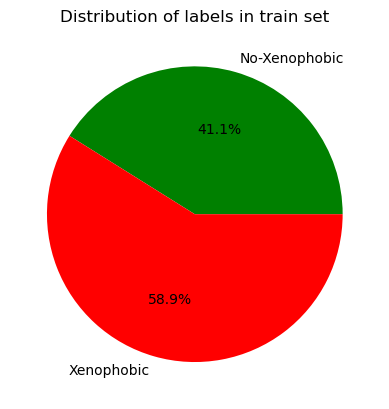

In [88]:
pie([ytr.tolist().count(0),ytr.tolist().count(1)],
    labels=['No-Xenophobic','Xenophobic'],
    autopct='%1.1f%%',
    colors=['green','red'])
title('Distribution of labels in train set')
show()

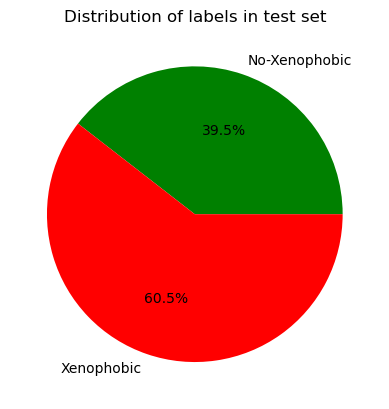

In [89]:
pie([yts.tolist().count(0),yts.tolist().count(1)],
    labels=['No-Xenophobic','Xenophobic'],
    autopct='%1.1f%%',
    colors=['green','red'])
title('Distribution of labels in test set')
show()

In [90]:
print('Train size:',len(xtr))
print('Test size',len(xts))

Train size: 4625
Test size 1157


# Phase 2: Modeling, Training

In [91]:
#Creating an embedding deep neural network from scratch.

model = Sequential([Embedding(len(tokenizer.word_index)+1,64,input_length=max_len),
                    GlobalMaxPooling1D(),
                    Dense(1, activation='sigmoid')])
#Compiling the model.

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [92]:
#Data train.

history = model.fit(xtr,ytr,epochs=20,validation_data=(xts,yts))

Epoch 1/20
145/145 [==============================] - 1s 6ms/step - loss: 0.6462 - accuracy: 0.5985 - val_loss: 0.5817 - val_accuracy: 0.6975
Epoch 2/20
145/145 [==============================] - 1s 5ms/step - loss: 0.4753 - accuracy: 0.8201 - val_loss: 0.4074 - val_accuracy: 0.8462
Epoch 3/20
145/145 [==============================] - 1s 5ms/step - loss: 0.2971 - accuracy: 0.9412 - val_loss: 0.3058 - val_accuracy: 0.9075
Epoch 4/20
145/145 [==============================] - 1s 5ms/step - loss: 0.1974 - accuracy: 0.9617 - val_loss: 0.2602 - val_accuracy: 0.9170
Epoch 5/20
145/145 [==============================] - 1s 5ms/step - loss: 0.1405 - accuracy: 0.9710 - val_loss: 0.2366 - val_accuracy: 0.9188
Epoch 6/20
145/145 [==============================] - 1s 6ms/step - loss: 0.1038 - accuracy: 0.9795 - val_loss: 0.2236 - val_accuracy: 0.9188
Epoch 7/20
145/145 [==============================] - 1s 6ms/step - loss: 0.0782 - accuracy: 0.9859 - val_loss: 0.2156 - val_accuracy: 0.9205
Epoch 

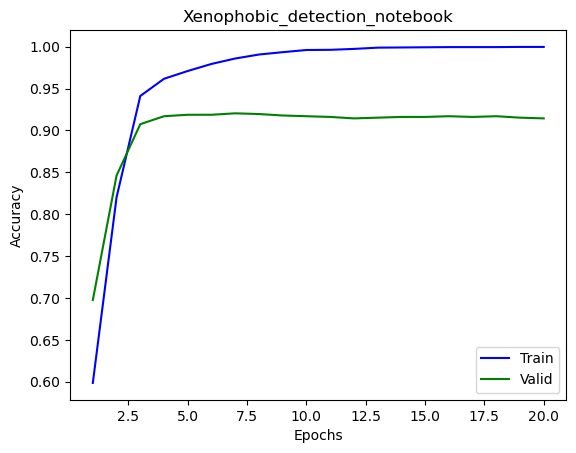

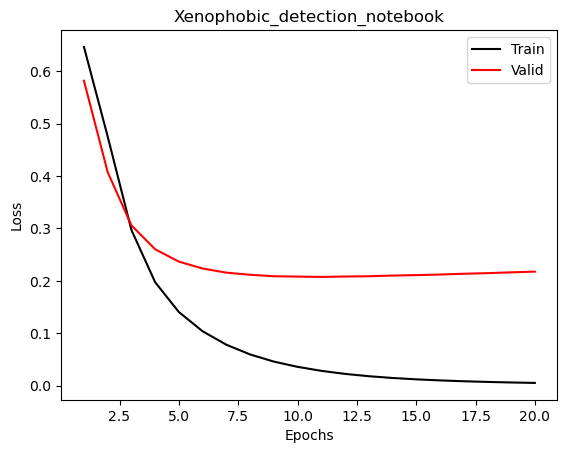

In [93]:
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['accuracy'],'blue')
plot(epoch,results['val_accuracy'],'green')
xlabel('Epochs')
ylabel('Accuracy')
title('Xenophobic_detection_notebook')
legend(['Train','Valid'])
show()
plot(epoch,results['loss'],'black')
plot(epoch,results['val_loss'],'red')
xlabel('Epochs')
ylabel('Loss')
title('Xenophobic_detection_notebook')
legend(['Train','Valid'])
show()

In [94]:
#Saving the model.

model.save('Xenophobia_detection_model')

INFO:tensorflow:Assets written to: Xenophobia_detection_model\assets


INFO:tensorflow:Assets written to: Xenophobia_detection_model\assets


# End